In [1]:
from pylab import *
%matplotlib inline
plt.style.use('dark_background')
from mayavi import mlab
#%qtconsole --style monokai
#mlab.init_notebook()

# 1. Load Data

In [2]:
temp = np.genfromtxt("data/input.txt")[1:,:]
data_points = temp[:,0:3]
data_weights = temp[:,3]

In [3]:
mybins = np.arange(-8.1,8,0.2)
sums, edges = np.histogramdd(data_points,(mybins,mybins,mybins), weights=data_weights)
count, edges = np.histogramdd(data_points,(mybins,mybins,mybins))

H = np.nan_to_num(sums/(count+1e-8))
image = np.exp(100*H)
H.astype(int16).tofile("data/output_hist.dat")
image.astype(int16).tofile("data/output_img.dat")

# 2. Plot Density

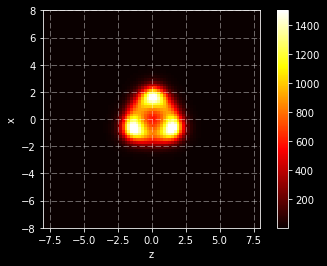

In [4]:
plt.imshow(image[:,40,:].T,cmap="hot",origin="lower",vmin=1,vmax=1500,extent=(-8,8,-8,8))
plt.grid(True,linestyle="--",alpha=0.5)
plt.colorbar()
plt.xlabel("z")
plt.ylabel("x")
plt.savefig("for_sxx.png",dpi=300)

# 3. Maya Render Contour3D

In [ ]:
mlab.clf()

src = mlab.pipeline.scalar_field(image)
mlab.pipeline.iso_surface(src,contours=[1200], transparent=False, opacity=1,
                          colormap="viridis",vmin=1,vmax=1200)
mlab.pipeline.iso_surface(src,contours=[700], transparent=True, opacity=0.4,
                          colormap="viridis",vmin=1,vmax=1200)
mlab.pipeline.iso_surface(src,contours=[500,300], transparent=True, opacity=0.1,
                          colormap="viridis",vmin=1,vmax=1200)

mlab.pipeline.image_plane_widget(src,plane_orientation='y_axes',slice_index=10, opacity=0.1,
                                 colormap="hot",vmin=1,vmax=1500)
mlab.show()

# Maya Render ScalarField

In [7]:
source = mlab.pipeline.scalar_field(H,cmap="hot")
a = H.min()
b = H.max()
mlab.clf()
vol = mlab.pipeline.volume(source, vmin=a + 0.65 * (b - a),vmax=a + 0.9 * (b - a))
mlab.show()